### Differential Equation

$\frac{\mathrm{d}\Psi}{\mathrm{d}x} = -\frac{1}{5}\Psi + e^{-\frac{x}{5}}cos(x),$

$\Psi(0) = 0, x \in [0, 2]$

In [1]:
from typing import List, Callable
import autograd.numpy as np

from core.neural_network import init_weights, forward
from core.optimizers import gradient_descent, adam
from core.activation_functions import elu, sigmoid, tanh, arctan
from core.plotting_tools import plot_ode, plot_system_ode

In [2]:
PSI_0 = np.array([0])


def derivative(x, psi) -> np.ndarray:
    """Example #2 derivative.
    Args:
        x: The input vector
        psi: The function vector

    Returns:
        Value of psi's partial derivatives at x.
    """
    psi_dot = -0.2 * psi + np.exp(-x / 5) * np.cos(x)
    return psi_dot


def analytical_solution(x):
    """Analytical solution to example #2.
    Args:
        x: The input vector

    Returns:
        Value of psi at x.
    """
    return np.exp(-x / 5) * np.sin(x)


def trial_solution(
    t: np.array, weights_list: List[List[np.array]], activation_fns: List[Callable]
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights_list: A list of weights and biases for each neural networks

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(weights_list), len(t))
    """
    f = [
        forward(t, weights_list[i], activation_fns).reshape(t.size)
        for i in range(len(weights_list))
    ]
    return np.array([PSI_0[i] + t * f[i] for i in range(len(weights_list))])

### Training

Iteration:  0
 2.910181513407068
Iteration:  1
 2.9021780841759517
Iteration:  2
 2.894184652068797
Iteration:  3
 2.8862014162161707
Iteration:  4
 2.8782285740836104
Iteration:  5
 2.8702663210769783
Iteration:  6
 2.862314850159316
Iteration:  7
 2.854374351481929
Iteration:  8
 2.846445012032225
Iteration:  9
 2.8385270153005995
Iteration:  10
 2.830620540968364
Iteration:  11
 2.822725764618458
Iteration:  12
 2.8148428574703415
Iteration:  13
 2.806971986140177
Iteration:  14
 2.7991133124270635
Iteration:  15
 2.7912669931258023
Iteration:  16
 2.7834331798663383
Iteration:  17
 2.7756120189797557
Iteration:  18
 2.7678036513904174
Iteration:  19
 2.760008212533611
Iteration:  20
 2.752225832297827
Iteration:  21
 2.7444566349906214
Iteration:  22
 2.736700739326848
Iteration:  23
 2.728958258437919
Iteration:  24
 2.7212292999006555
Iteration:  25
 2.7135139657842338
Iteration:  26
 2.705812352713694
Iteration:  27
 2.6981245519484554
Iteration:  28
 2.690450649474339
Iteration

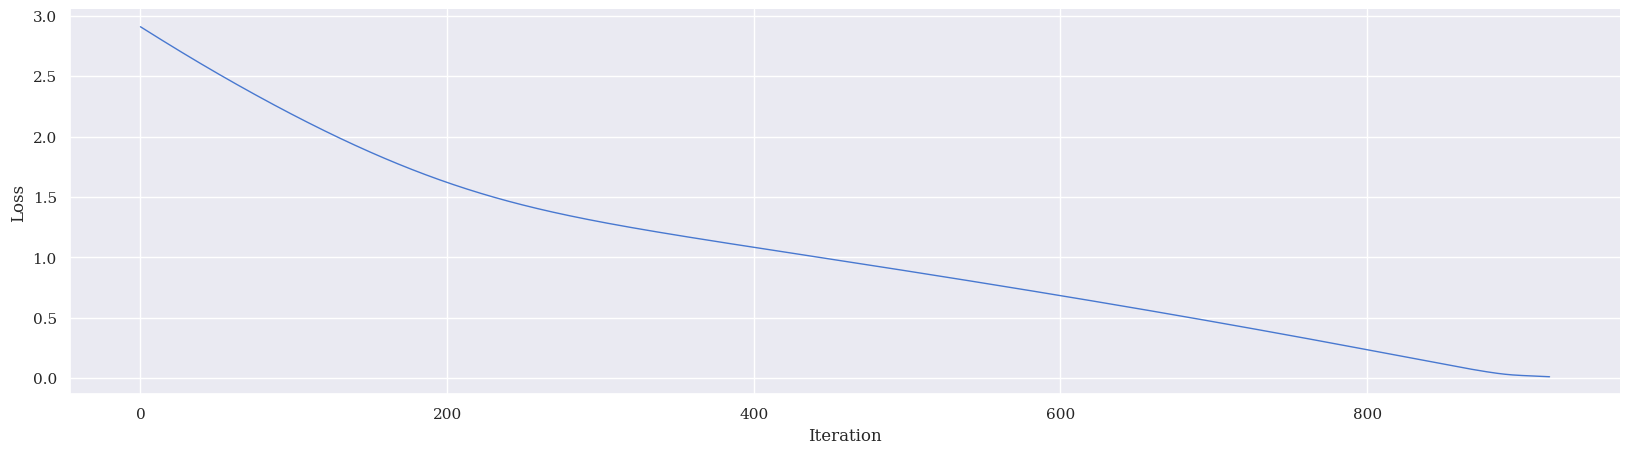

In [5]:
def train():
    t = np.arange(0, 2, 0.2)
    hidden_sizes = np.array([10])
    activation_fns = [sigmoid] * (len(hidden_sizes)) + [lambda x: x]
    nn_weights = init_weights(1, hidden_sizes, 1)
    adam(
        t,
        [nn_weights],
        activation_fns,
        trial_solution,
        derivative,
        num_iters=50000,
        step_size=0.001,
    )

    return nn_weights, activation_fns


nn_weights, activation_fns = train()

### Evaluating Results

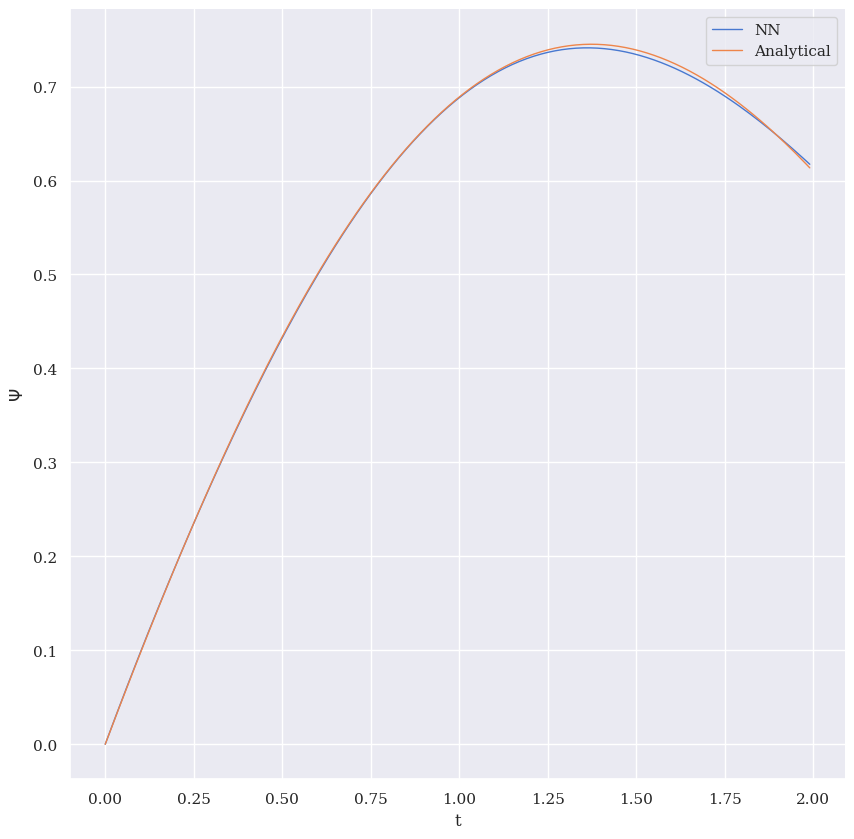

In [6]:
t = np.arange(0, 2, 0.01)
res = trial_solution(t, [nn_weights], activation_fns)
an_sol = analytical_solution(t)
plot_ode(t, res, an_sol)